# knn分类

## 生成已标记的数据集

In [1]:
from sklearn.datasets.samples_generator import make_blobs
# 生成数据
centers = [[-2,2], [2,2], [0,4]]
X, y = make_blobs(n_samples=60, centers=centers,
                 random_state=0, cluster_std=0.60)



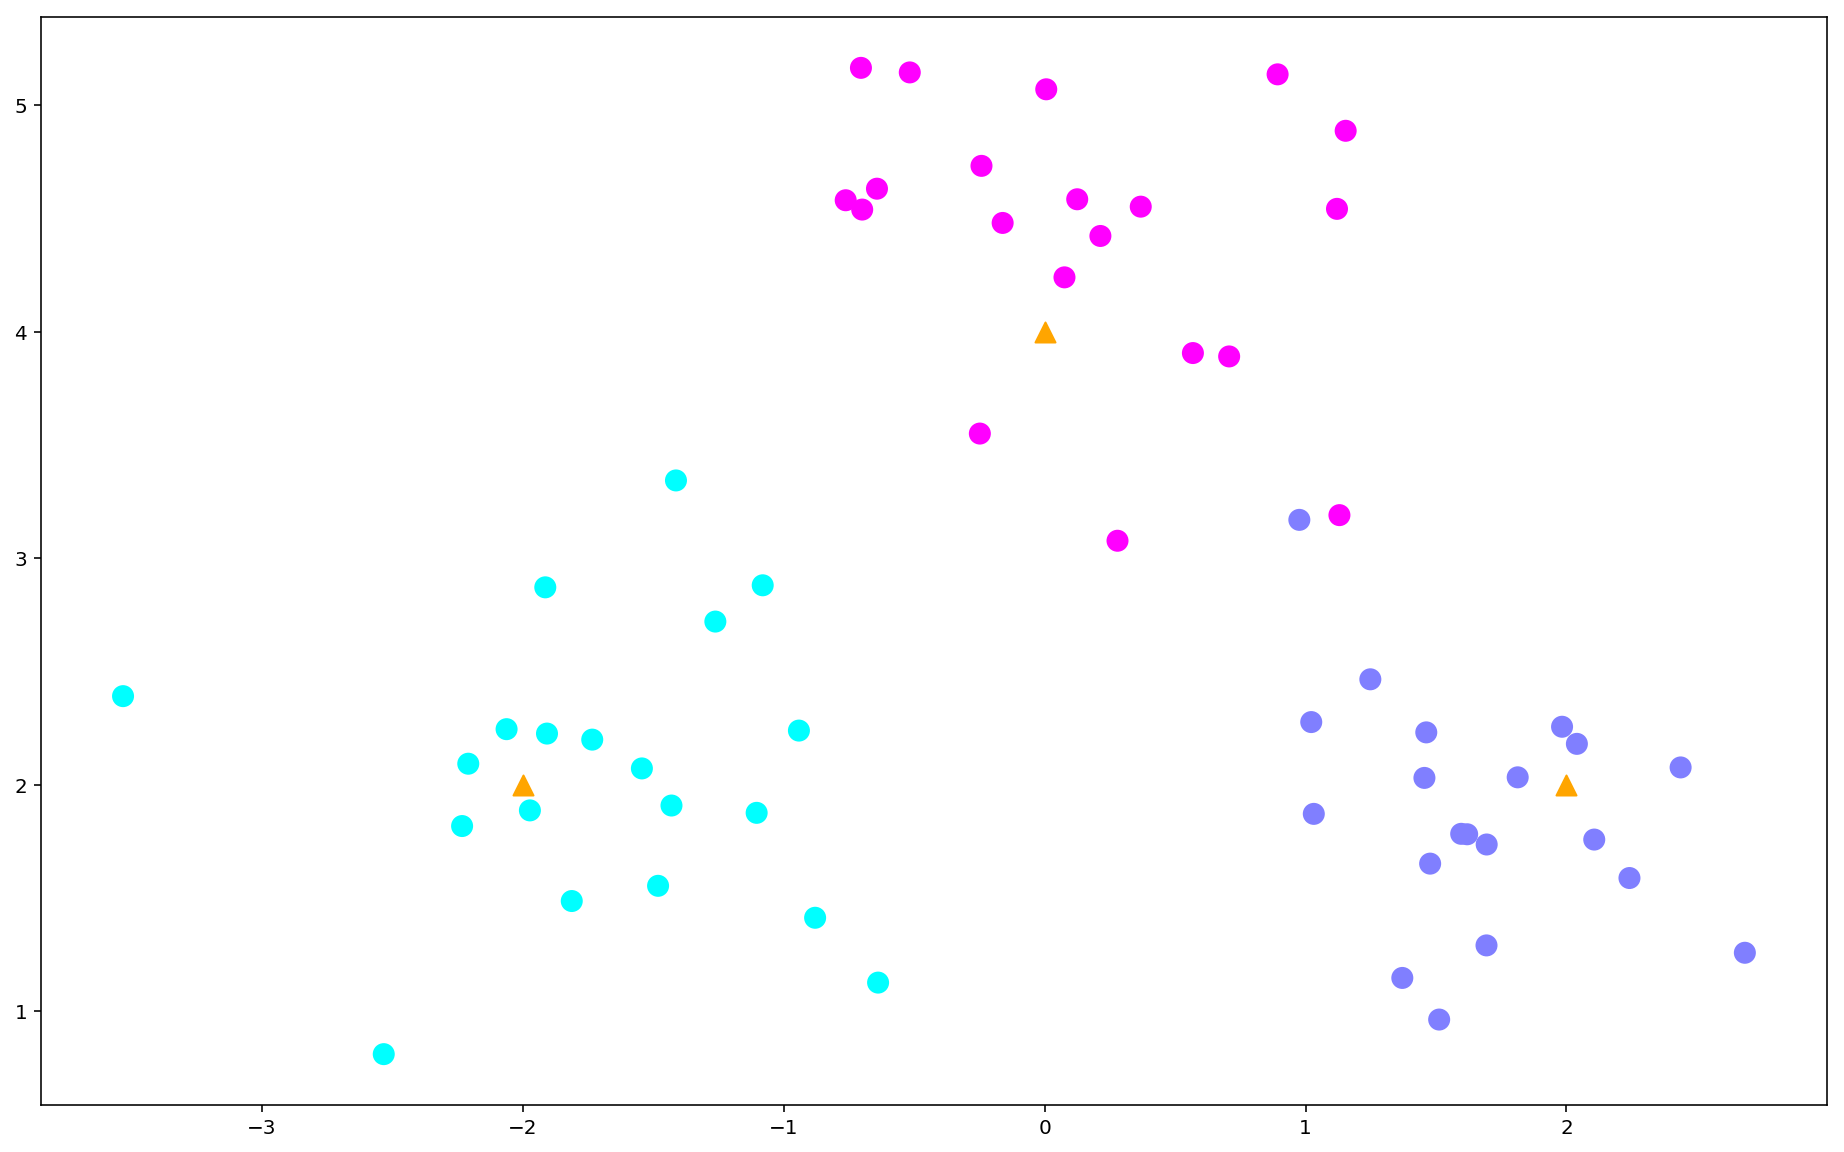

In [5]:
# 画出数据
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(16,10), dpi=144)
c = np.array(centers)
# 画出样本
plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap='cool')
# 画出中心点
plt.scatter(c[:,0], c[:,1], s=100, marker='^',c='orange')
plt.savefig('knn_centers.png')
plt.show()


In [6]:
from sklearn.neighbors import KNeighborsClassifier
# 模型训练
k = 5
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X, y)

"""
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
"""

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
# 进行预测
X_sample = np.array([[0, 2]])
y_sample = clf.predict(X_sample)
neighbors = clf.kneighbors(X_sample, return_distance=False)

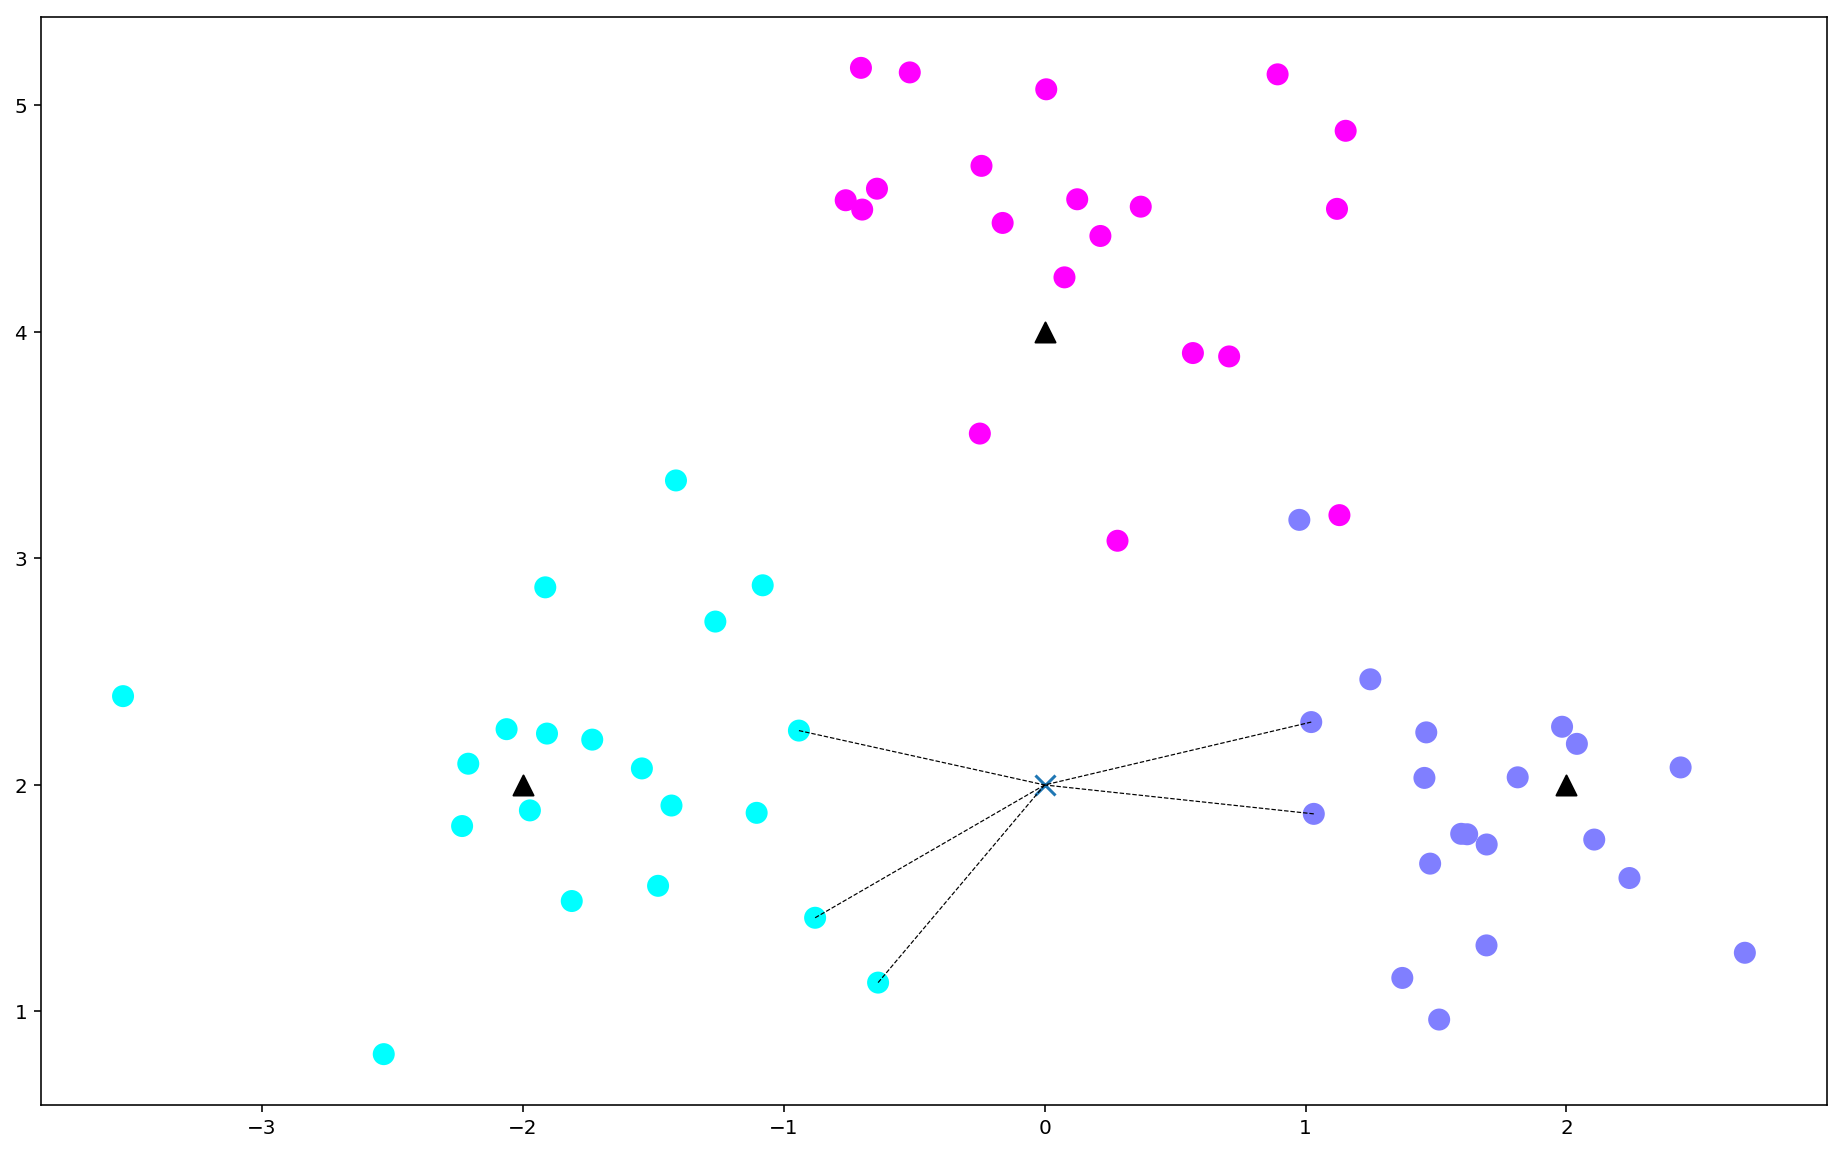

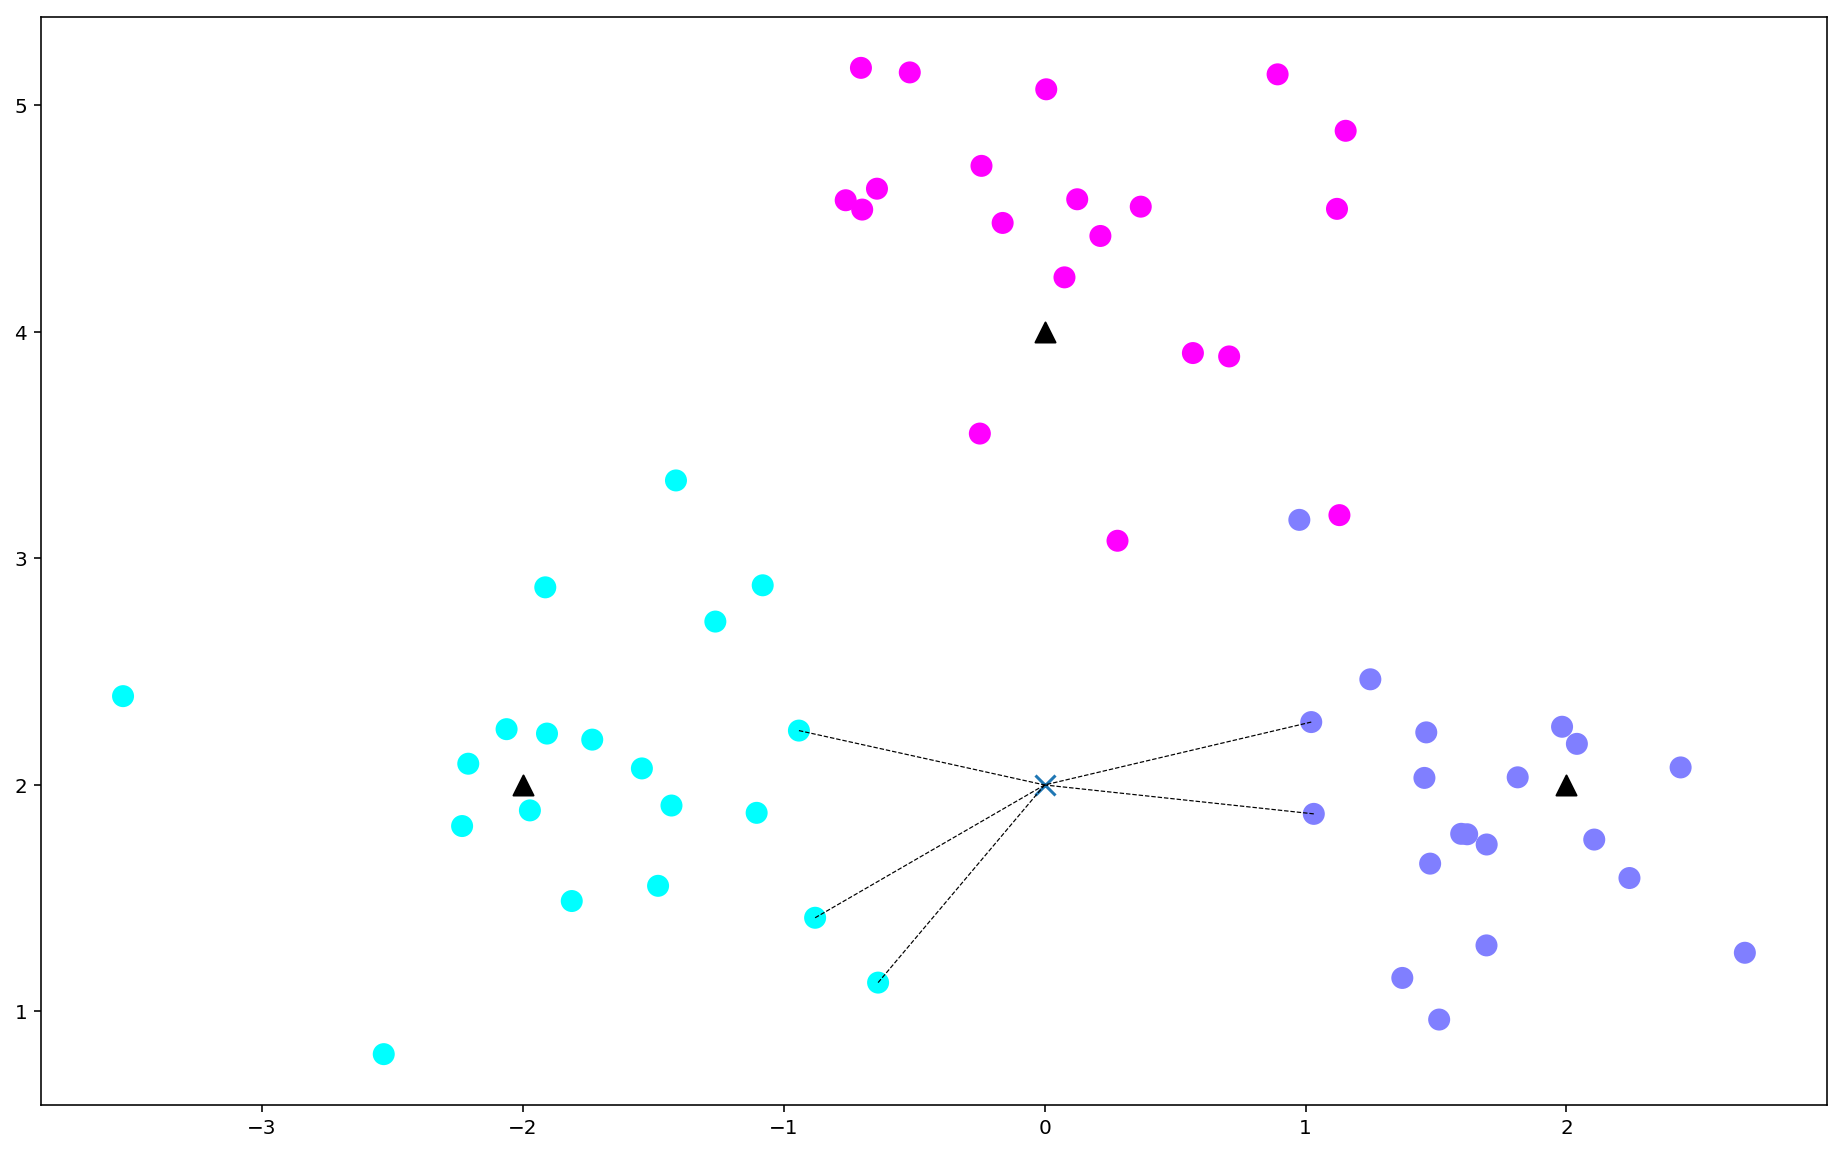

In [19]:
# 画出示意图
plt.figure(figsize=(16,10), dpi=144)
c = np.array(centers)
plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap='cool') # 出样本
plt.scatter(c[:,0], c[:,1], s=100, marker='^',c='k') # 中心点
plt.scatter(X_sample[0][0], X_sample[0][1], marker="x",
           s=100, cmap='cool')      # 待预测的点
for i in neighbors[0]:
    plt.plot([X[i][0], X_sample[0][0]], [X[i][1], X_sample[0][1]],
            'k--', linewidth=0.6)  # 预测点与距离最近的5个样本的连线
plt.savefig('knn_predict.png')
plt.show()

In [16]:
y_sample

array([0])

# knn回归

生成数据集，在余弦曲线的基础上加入一些噪声数据。

In [2]:
import numpy as np
n_dots = 40
X = 5 * np.random.rand(n_dots, 1)
y = np.cos(X).ravel()

# 添加一些噪声
y += 0.2 * np.random.rand(n_dots) - 0.1


使用KNeighborsRegressor来训练模型。

In [7]:
# 训练模型
from sklearn.neighbors import KNeighborsRegressor
k = 5
knn = KNeighborsRegressor(k)
knn.fit(X, y)

"""
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')
"""

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

我们怎么进行回归拟合呢？
一个方法是，在X轴上的指定区间内生成足够多的点，针对这些足够密集的点，使用训练出来的模型去预测，得到预测值y_pred，然后在坐标轴上把所有的预测点连接起来，这样就画出了拟合曲线。如下：

In [8]:
# 生成足够密集的点并进行预测
T = np.linspace(0, 5, 500)[:, np.newaxis]
y_pred = knn.predict(T)
knn.score(X, y) # 计算拟合曲线对训练样本的拟合准确性。

"""
0.9804488058034699
"""

0.9804488058034699

把这些预测点连接起来，构成拟合曲线。

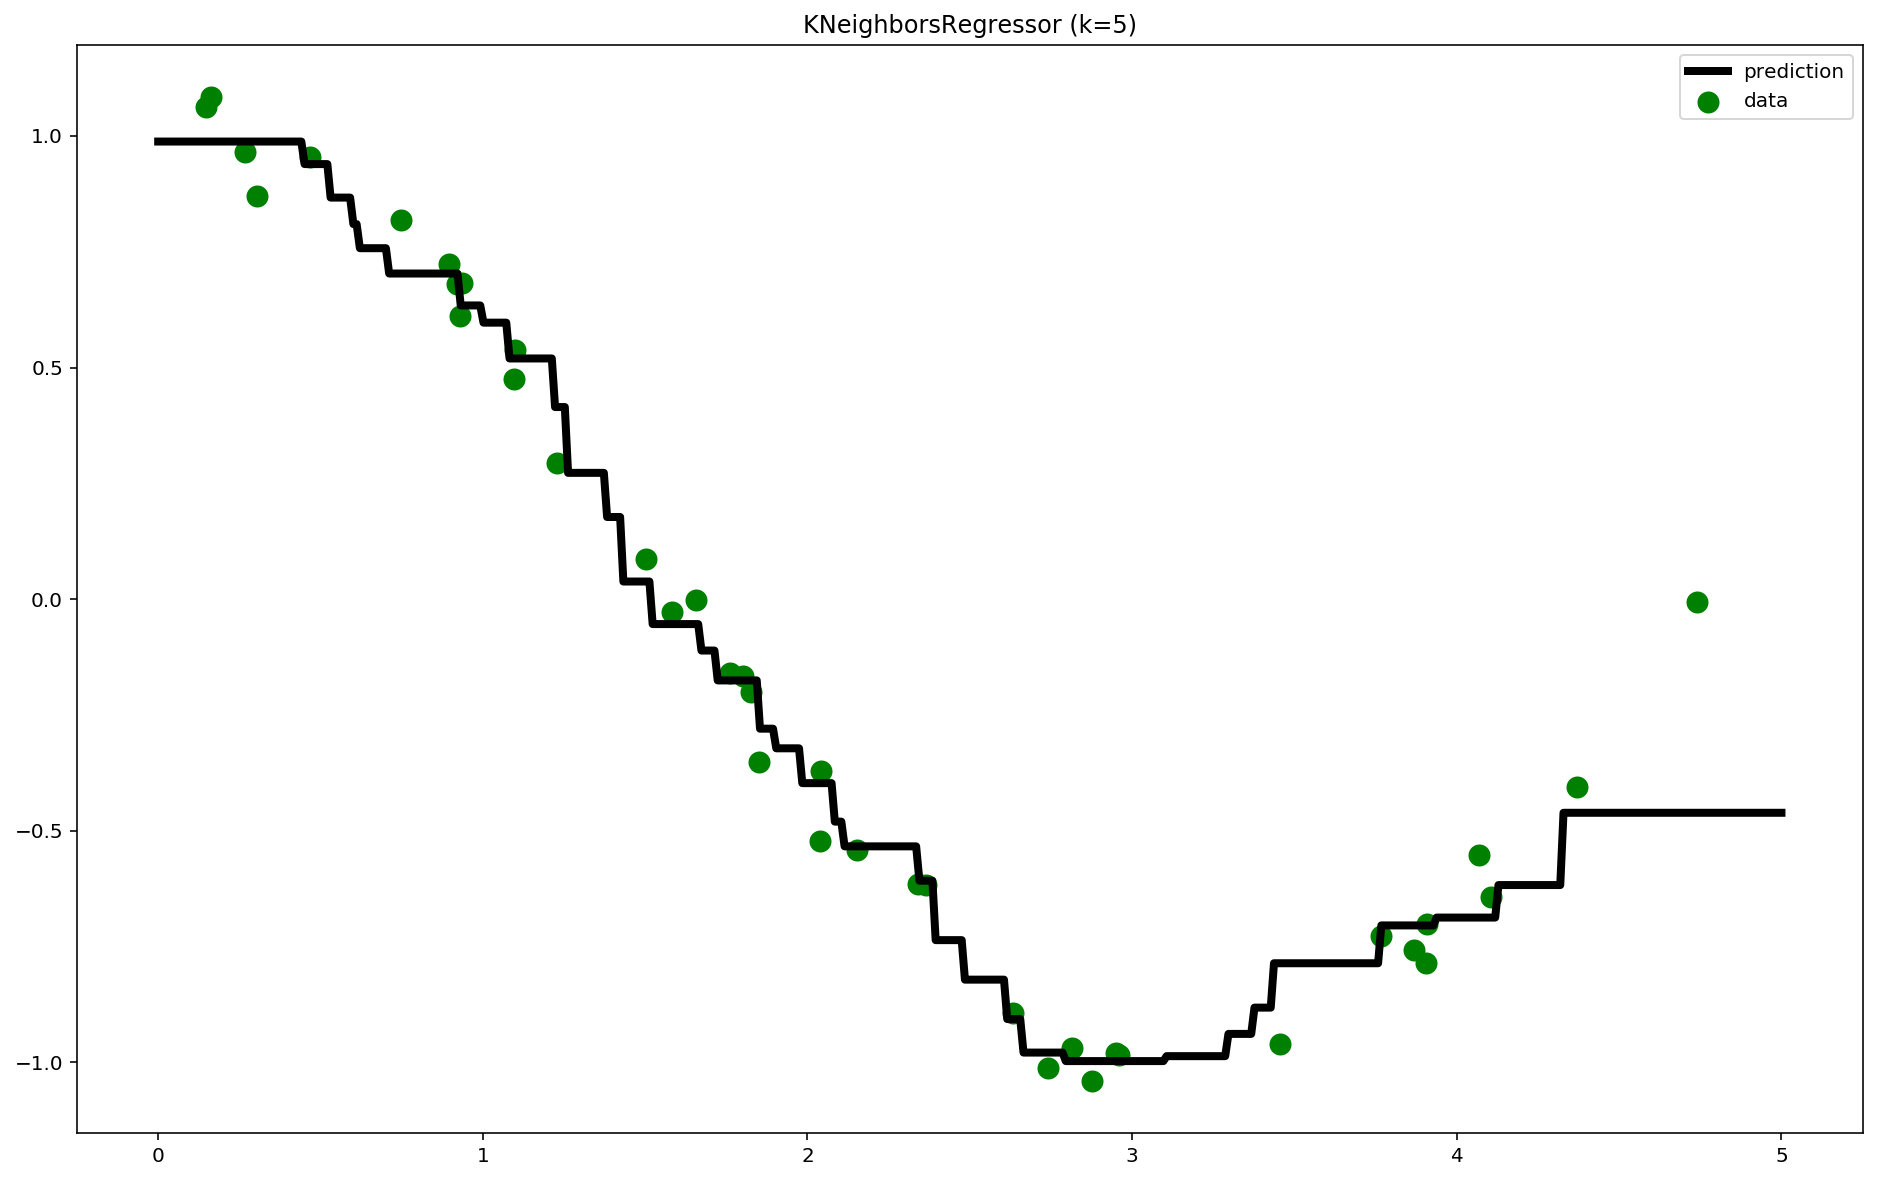

In [10]:
# 画出拟合曲线。
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10), dpi=144)
plt.scatter(X, y, c='g', label='data', s=100) # 画出训练样本
plt.plot(T, y_pred, c='k', label='prediction', lw=4) # 画出拟合曲线
plt.axis('tight')
plt.title('KNeighborsRegressor (k=%i)' % k)
plt.legend()
plt.savefig('knn_regressor.png')
plt.show()

# 糖尿病检查

## 加载数据

In [11]:
import pandas as pd
data = pd.read_csv('Corpus/pima-indians-diabetes/diabetes.csv')
print('dataset shape {}'.format(data.shape))
data.info()

dataset shape (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


从输出可以看到，总共有768个样本、8个特征，其中Outcome为标签，0表示没有糖尿病，1表示有糖尿病。这8个特征分别为：
- Pregnancies：怀孕次数
- Glucose：血浆葡萄糖浓度，采用2小时口服葡萄糖耐量实验测得
- BloodPressure：舒张压（毫米汞柱）
- SkinThickness：肱三头肌皮肤褶皱厚度（毫米）
- Insulin：两个小时血清胰岛素（${\mu}$U/毫升）
- BMI：身体质量指数，体重除以身高的平方
- Diabetes Pedigree Function：糖尿病血统指数，糖尿病和家庭遗传相关
- Age：年龄

In [12]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


进一步观察数据集里阳性和阴性样本的个数：

In [13]:
data.groupby('Outcome').size()

"""
Outcome
0    500
1    268
dtype: int64
"""

Outcome
0    500
1    268
dtype: int64

其中阴性样本500例，阳性样本268例。接着，我们要把数据集分词训练集和测试集。

In [14]:
X = data.iloc[:, 0:8]
Y = data.iloc[:, 8]
print('shape of X {}, shape of Y {}'.format(X.shape, Y.shape))

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.2)

shape of X (768, 8), shape of Y (768,)


## 模型比较

使用普通的knn算法、带权重的knn以及指定半径的knn算法分别对数据集进行拟合并计算评分。

In [16]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

# 构建3个模型
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=2)))
models.append(('KNN with weights', KNeighborsClassifier(n_neighbors=2, weights='distance')))
models.append(('Radius Neighbors', RadiusNeighborsClassifier(n_neighbors=2, radius=500.0)))

# 分别训练3个模型，并计算得分
results = []
for name, model in models:
    model.fit(X_train, Y_train)
    results.append((name, model.score(X_test, Y_test)))
for i in range(len(results)):
    print('name: {}; score: {}'.format(results[i][0], results[i][1]))
    
"""
name: KNN; score: 0.6623376623376623
name: KNN with weights; score: 0.6493506493506493
name: Radius Neighbors; score: 0.6038961038961039
"""

name: KNN; score: 0.6623376623376623
name: KNN with weights; score: 0.6493506493506493
name: Radius Neighbors; score: 0.6038961038961039


权重算法，我们选择了距离越近，权重越高。RadiusNeighborsClassifier模型的半径选择了500.从输出可以看出，普通的knn算法还是最好。
问题来了，这个判断准确吗？
答案是：不准确。因为我们的训练集和测试集是随机分配的，不同的训练样本和测试样本组合可能导致计算出来的算法准确性有差异。
那么该如何解决呢？
我们可以多次随机分配训练集和交叉验证集，然后求模型评分的平均值。scikit-learn提供了KFold和cross_val_score()函数来处理这种问题。

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model, X, Y, cv=kfold)
    results.append((name, cv_result))
    
for i in range(len(results)):
    print('name: {}; cross_val_score: {}'.format(results[i][0], results[i][1].mean()))
    
"""
name: KNN; cross_val_score: 0.7147641831852358
name: KNN with weights; cross_val_score: 0.6770505809979495
name: Radius Neighbors; cross_val_score: 0.6497265892002735
"""

name: KNN; cross_val_score: 0.7147641831852358
name: KNN with weights; cross_val_score: 0.6770505809979495
name: Radius Neighbors; cross_val_score: 0.6497265892002735


上述代码，我们通过KFold把数据集分成10份，其中1份会作为交叉验证集来计算模型准确性，剩余9份作为训练集。cross_val_score()函数总共计算出10次不同训练集和交叉验证集组合得到的模型评分，最后求平均值。
看起来，还是普通的knn算法性能更优一些。

## 模型训练及分析

根据上面模型比较得到的结论，我们接下来使用普通的knn算法模型对数据集进行训练，并查看对训练样本的拟合情况以及对测试样本的预测准确性情况：

In [18]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
train_score = knn.score(X_train, Y_train)
test_score = knn.score(X_test, Y_test)
print('train score: {}; test score : {}'.format(train_score, test_score))

"""
train score: 0.8485342019543974; test score : 0.6623376623376623
"""

train score: 0.8485342019543974; test score : 0.6623376623376623


'\n\n'

从这里可以看到两个问题。
- 对训练样本的拟合情况不佳，评分才0.84多一些，说明算法模型太简单了，无法很好地拟合训练样本。
- 模型准确性不好，0.66左右的预测准确性。
我们画出学习曲线，查看一下。

In [22]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(plt, estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig('learning_curve.png')
    return plt

<module 'matplotlib.pyplot' from 'D:\\SmartTool\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

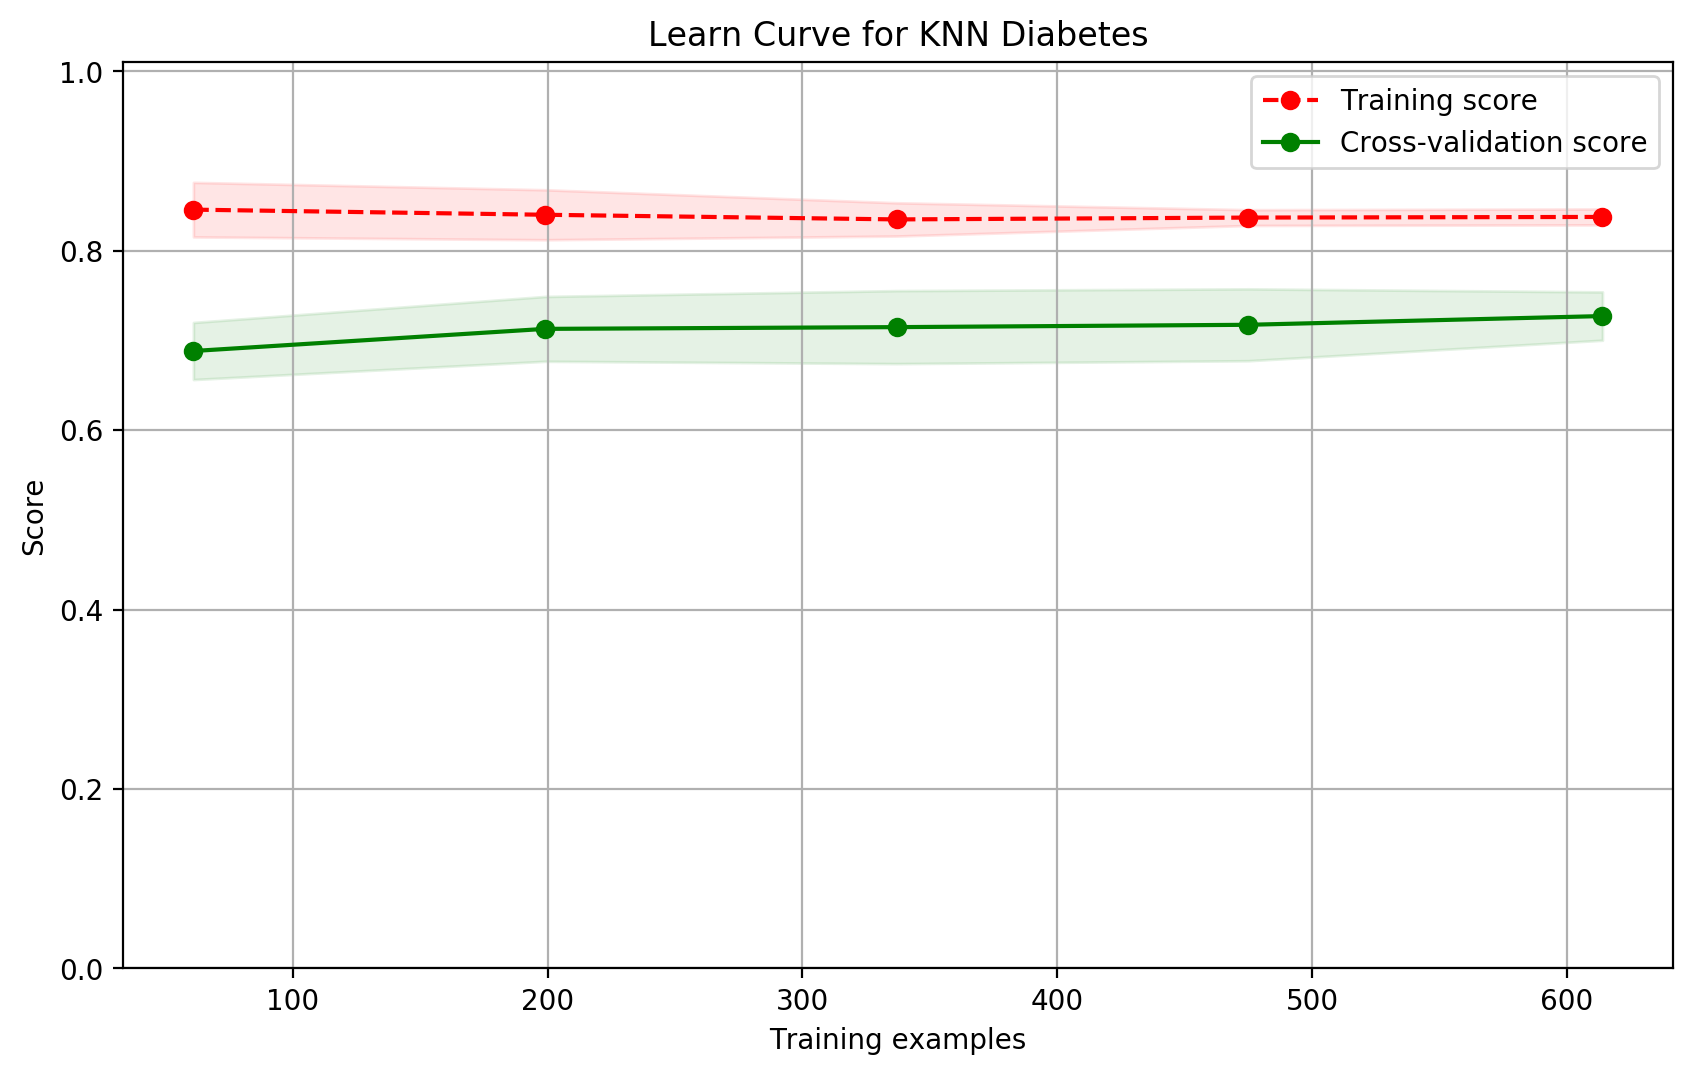

In [23]:
from sklearn.model_selection import ShuffleSplit

knn = KNeighborsClassifier(n_neighbors=2)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(10,6), dpi=200)
plot_learning_curve(plt, knn, 'Learn Curve for KNN Diabetes', X, Y, ylim=(0.0, 1.01), cv=cv)


从图中可以看出训练样本评分较低，且测试样本与训练样本距离较大，这是欠拟合现象。不过，knn算法没有更好的措施解决欠拟合问题，也许可以换用其它类型的算法。